In [1]:
import quimb as qu
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
np.zeros

In [264]:
test_1 = qu.tensor.MPS_rand_state(L=3, bond_dim=5)
test_2 = qu.tensor.MPS_rand_state(L=3, bond_dim=5)
test_mpo = qu.tensor.MPO_rand_herm(L=3, bond_dim=5)

In [322]:
test_1.right_canonize()
test_2.right_canonize()
test_1.shift_orthogonality_center(0, 1)
test_2.shift_orthogonality_center(0, 1)

In [177]:
test_2.align_(test_mpo, test_1)
print(test_2)

MatrixProductState([
    Tensor(shape=(2, 2), inds=('_46963aAAAKY', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(2, 4, 2), inds=('_46963aAAAKY', '_46963aAAAKZ', 'k1'), tags=oset(['I1'])),
    Tensor(shape=(4, 2), inds=('_46963aAAAKZ', 'k2'), tags=oset(['I2'])),
], L=3, max_bond=4)


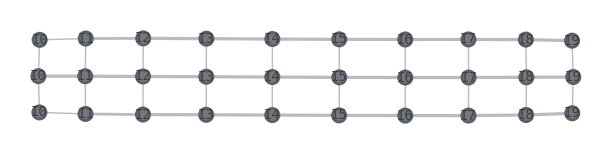

In [168]:
test_3 = test_1 & test_mpo & test_2
test_3.draw()

In [330]:
def get_precontracted_LR_mps_mps(mps_1, mps_2, center=0):
    n = mps_1.L
    left_networks = [1]*n
    right_networks = [1]*n

    # from left to right
    for i in range(center):
        if i == 0:
            A = mps_1[0].copy()
            B = mps_2[0].copy()

            tn = A | B
            qu.tensor.connect(A, B, 1, 1)
            F = tn ^...

        elif i == n-1:
            A = mps_1[n-1].copy()
            B = mps_2[n-1].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | B
            qu.tensor.connect(AF, B, 0, 1)
            qu.tensor.connect(AF, B, 1, 0)
            F = tn ^...
        
        else:
            A = mps_1[i].copy()
            B = mps_2[i].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | B
            qu.tensor.connect(AF, B, 1, 2)
            qu.tensor.connect(AF, B, 2, 0)
            FAW = tn ^ ...
        
        left_networks[i+1] = F
    
    # from right to left
    for i in range(n-1, center, -1):
        if i == n-1:
            A = mps_1[n-1].copy()
            B = mps_2[n-1].copy()

            tn = A | B 
            qu.tensor.connect(A, B, 1, 1)
            F = tn ^...

        elif i == 0:
            A = mps_1[0].copy()
            B = mps_2[0].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | B
            qu.tensor.connect(AF, B, 0, 1)
            qu.tensor.connect(AF, B, 1, 0)      
            F = tn ^...
        
        else:
            A = mps_1[i].copy()
            B = mps_2[i].copy()

            tn = A | F
            qu.tensor.connect(A, F, 1, 0)
            AF = tn ^ ...
            tn = AF | B
            qu.tensor.connect(AF, B, 1, 2)
            qu.tensor.connect(AF, B, 2, 1)
            F = tn ^...
        
        right_networks[i-1] = F

    return left_networks, right_networks

In [331]:
def get_precontracted_LR_mps_mpo(mps_1, mpo, mps_2, center=0):
    n = mps_1.L
    left_networks = [1]*n
    right_networks = [1]*n

    # from left to right
    for i in range(center):
        if i == 0:
            A = mps_1[0].copy()
            B = mps_2[0].copy()
            W = mpo[0].copy()

            tn = A | W 
            qu.tensor.connect(A, W, 1, 1)
            AW = tn ^ ...
            tn = AW | B
            qu.tensor.connect(AW, B, 2, 1)
            F = tn ^...

        elif i == n-1:
            A = mps_1[n-1].copy()
            B = mps_2[n-1].copy()
            W = mpo[n-1].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 0, 1)
            qu.tensor.connect(AF, W, 1, 0)
            FAW = tn ^...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 1, 1)
            qu.tensor.connect(FAW, B, 0, 0)
            F = tn ^...
        
        else:
            A = mps_1[i].copy()
            B = mps_2[i].copy()
            W = mpo[i].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 1, 2)
            qu.tensor.connect(AF, W, 2, 0)
            FAW = tn ^ ...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 3, 2)
            qu.tensor.connect(FAW, B, 1, 0)
            F = tn ^...
        
        left_networks[i+1] = F

    # from right to left
    for i in range(n-1, center, -1):
        if i == n-1:
            A = mps_1[n-1].copy()
            B = mps_2[n-1].copy()
            W = mpo[n-1].copy()

            tn = A | W 
            qu.tensor.connect(A, W, 1, 1)
            AW = tn ^ ...
            tn = AW | B
            qu.tensor.connect(AW, B, 2, 1)
            F = tn ^...

        elif i == 0:
            A = mps_1[0].copy()
            B = mps_2[0].copy()
            W = mpo[0].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 0, 1)
            qu.tensor.connect(AF, W, 1, 0)
            FAW = tn ^...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 1, 1)
            qu.tensor.connect(FAW, B, 0, 0)
            F = tn ^...
        
        else:
            A = mps_1[i].copy()
            B = mps_2[i].copy()
            W = mpo[i].copy()

            tn = A | F
            qu.tensor.connect(A, F, 1, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 1, 2)
            qu.tensor.connect(AF, W, 2, 1)
            FAW = tn ^ ...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 3, 2)
            qu.tensor.connect(FAW, B, 1, 1)
            F = tn ^...
        
        right_networks[i-1] = F

    return left_networks, right_networks

In [429]:
l, r = get_precontracted_LR_mps_mps(test_1, test_2, 1)

In [430]:
i = 1
left_tn = l[i].copy()
right_tn = r[i].copy()
A = test_1[i].copy()
tn = left_tn | A | right_tn
qu.tensor.connect(left_tn, A, 0, 0)
qu.tensor.connect(right_tn, A, 0, 1)

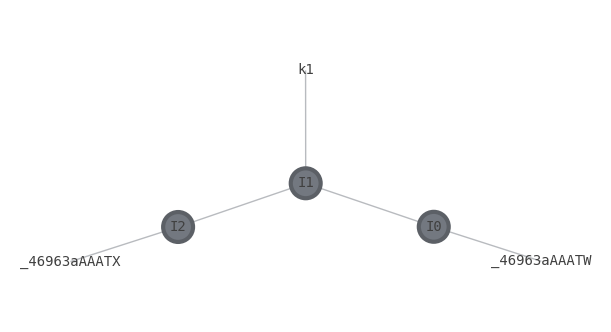

In [431]:
tn.draw()

In [432]:
tn.contract()

Tensor(shape=(2, 2, 2), inds=('_46963aAAATW', 'k1', '_46963aAAATX'), tags=oset(['I0', 'I1', 'I2']))

In [394]:
l, r = get_precontracted_LR_mps_mpo(test_1, test_mpo, test_2, 1)

2
saved


In [395]:
i = 1
left_tn = l[i].copy()
right_tn = r[i].copy()
W = test_mpo[i].copy()
tn = left_tn | W | right_tn
qu.tensor.connect(W, left_tn, 0, 1)
qu.tensor.connect(W, right_tn, 1, 1)
temp = tn^...
temp = temp.fuse({'MUS': temp.inds[::2], 'LDR': temp.inds[1::2]}).data

In [397]:
F = left_tn.copy()
B = test_2[1].copy()
W = test_mpo[1].copy()
A = test_1[1].copy()


In [398]:
tn = left_tn | B | W | A
qu.tensor.connect(left_tn, mps_1_t, 0, 0)

Tensor(shape=(2, 2, 2), inds=('_46963aAAATS', '_46963aAAATT', 'k1'), tags=oset(['I1']))

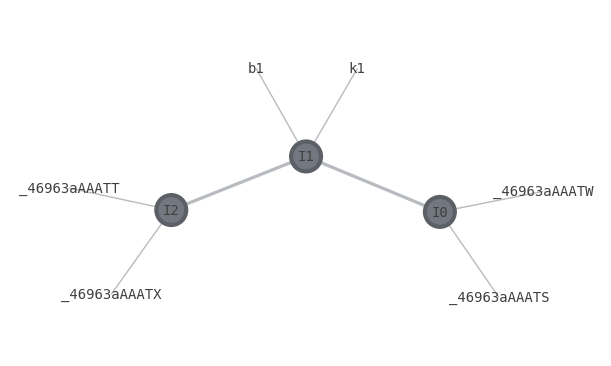

In [370]:
tn.draw()

In [371]:
print(left_tn)

Tensor(shape=(2, 5, 2), inds=('_46963aAAATS', '_46963aAAAUi', '_46963aAAATW'), tags=oset(['I0']), backend='numpy', dtype='float64')


In [372]:
print(right_tn)

Tensor(shape=(2, 5, 2), inds=('_46963aAAATT', '_46963aAAAUj', '_46963aAAATX'), tags=oset(['I2']), backend='numpy', dtype='float64')


In [378]:
print(W)

Tensor(shape=(5, 5, 2, 2), inds=('_46963aAAAUi', '_46963aAAAUj', 'k1', 'b1'), tags=oset(['I1']), backend='numpy', dtype='float64')


In [377]:
print((tn^...).inds)

('_46963aAAATS', '_46963aAAATW', 'k1', 'b1', '_46963aAAATT', '_46963aAAATX')


In [380]:
(tn^...).inds[::2]

('_46963aAAATS', 'k1', '_46963aAAATT')

In [381]:
(tn^...).inds[1::2]

('_46963aAAATW', 'b1', '_46963aAAATX')

In [386]:
a = np.arange(3)

In [389]:
np.concatenate((a, a))

array([0, 1, 2, 0, 1, 2])

In [353]:
tn_1 = tn.copy()
tn_2 = tn.copy()

In [359]:
tn_3 = tn_1^...

In [367]:
tn_3.fuse({'LDR': tn_3.inds}).data

array([-0.63857501,  0.2987523 , -0.03033445,  0.06378261,  0.00509401,
        0.20408559, -0.58454377,  0.33854441])

In [390]:
print(test_1)

MatrixProductState([
    Tensor(shape=(2, 2), inds=('_46963aAAATS', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(2, 2, 2), inds=('_46963aAAATS', '_46963aAAATT', 'k1'), tags=oset(['I1'])),
    Tensor(shape=(2, 2), inds=('_46963aAAATT', 'k2'), tags=oset(['I2'])),
], L=3, max_bond=2)


In [409]:
dummy_t = np.ones((1, 1, 1))

In [425]:
a = (1, 3, 2)

In [427]:
b = (a[0], a[2], a[1])

In [428]:
b

(1, 2, 3)

In [257]:
print(r[0])

Tensor(shape=(512, 1024, 512), inds=('_46963aAAANs', '_46963aAAAOc', '_46963aAAAOK'), tags=oset(['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']), backend='numpy', dtype='float64')


In [245]:
r

[Tensor(shape=(5, 5, 5), inds=('_46963aAAALZ', '_46963aAAAMJ', '_46963aAAALr'), tags=oset(['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANn', '_46963aAAAMK', '_46963aAAALs'), tags=oset(['I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANi', '_46963aAAAML', '_46963aAAALt'), tags=oset(['I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANd', '_46963aAAAMM', '_46963aAAALu'), tags=oset(['I4', 'I5', 'I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANY', '_46963aAAAMN', '_46963aAAALv'), tags=oset(['I5', 'I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANT', '_46963aAAAMO', '_46963aAAALw'), tags=oset(['I6', 'I7', 'I8', 'I9'])),
 Tensor(shape=(5, 5, 5), inds=('_46963aAAANO', '_46963aAAAMP', '_46963aAAALx'), tags=oset(['I7', 'I8', 'I9'])),
 Tensor(shape=(4, 5, 4), inds=('_46963aAAANJ', '_46963aAAAMQ', '_46963aAAALy'), tags=oset(

# mps mps

In [291]:
A = test_1[2].copy()
B = test_2[2].copy()

In [292]:
tn = A | B 

In [294]:
qu.tensor.connect(A, B, 1, 1)

In [295]:
F = tn ^...

In [296]:
A = test_1[1].copy()
B = test_2[1].copy()

In [297]:
tn = A | F 

In [299]:
qu.tensor.connect(A, F, 1, 0)

In [300]:
AF = tn ^...

In [301]:
tn = AF | B

In [303]:
qu.tensor.connect(AF, B, 1, 2)
qu.tensor.connect(AF, B, 2, 1)

In [304]:
F = tn ^...

In [305]:
A = test_1[0].copy()
B = test_2[0].copy()

In [306]:
tn = A | F 

In [308]:
qu.tensor.connect(A, F, 0, 0)

In [309]:
AF = tn ^...

In [310]:
tn = AF | B

In [312]:
qu.tensor.connect(AF, B, 0, 1)
qu.tensor.connect(AF, B, 1, 0)

In [313]:
F = tn ^...

In [314]:
F

0.3873951964811376

In [311]:
print(tn)

TensorNetwork([
    Tensor(shape=(2, 4), inds=('k0', '_46963aAAATW'), tags=oset(['I0', 'I1', 'I2'])),
    Tensor(shape=(4, 2), inds=('_46963aAAATW', 'k0'), tags=oset(['I0'])),
])


In [266]:
A = test_1[0].copy()
B = test_2[0].copy()

In [267]:
tn = A | B 

In [269]:
qu.tensor.connect(A, B, 1, 1)

In [270]:
F = tn ^...

In [271]:
A = test_1[1].copy()
B = test_2[1].copy()

In [272]:
tn = A | F 

In [274]:
qu.tensor.connect(A, F, 0, 0)

In [275]:
AF = tn ^...

In [276]:
tn = AF | B

In [278]:
qu.tensor.connect(AF, B, 1, 2)
qu.tensor.connect(AF, B, 2, 0)

In [279]:
F = tn ^...

In [280]:
A = test_1[2].copy()
B = test_2[2].copy()

In [281]:
tn = A | F 

In [282]:
qu.tensor.connect(A, F, 0, 0)

In [284]:
AF = tn ^...

In [285]:
tn = AF | B

In [287]:
qu.tensor.connect(AF, B, 0, 1)
qu.tensor.connect(AF, B, 1, 0)

In [288]:
F = tn ^...

In [289]:
F

0.38739519648113774

In [318]:
left, right = get_precontracted_LR_mps_mps(test_1, test_2)

2
1


In [320]:
right

[Tensor(shape=(4, 4), inds=('_46963aAAATS', '_46963aAAATW'), tags=oset(['I1', 'I2'])),
 Tensor(shape=(2, 2), inds=('_46963aAAAUF', '_46963aAAATX'), tags=oset(['I2'])),
 1]

In [290]:
ver = test_1 & test_2
ver ^...

0.3873951964811375

# right to left

In [227]:
# if -1

In [228]:
A = test_1[2].copy()
B = test_2[2].copy()
W = test_mpo[2].copy()

In [229]:
tn = A | W 

In [230]:
qu.tensor.connect(A, W, 1, 1)

In [231]:
AW = tn ^...

In [232]:
tn = AW | B

In [233]:
qu.tensor.connect(AW, B, 2, 1)

In [234]:
F = tn ^...

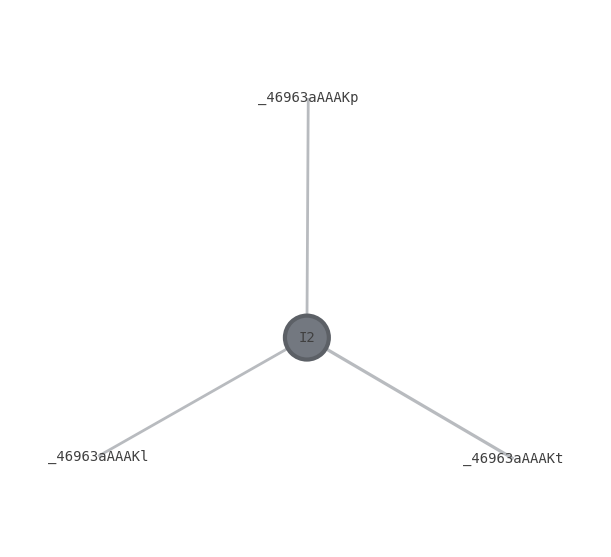

In [235]:
F.draw()

In [189]:
# in between

In [190]:
A = test_1[1].copy()
B = test_2[1].copy()
W = test_mpo[1].copy()

In [191]:
tn = A | F

In [195]:
qu.tensor.connect(A, F, 1, 0)

In [196]:
AF = tn ^ ...

In [197]:
tn = AF | W

In [199]:
qu.tensor.connect(AF, W, 1, 2)
qu.tensor.connect(AF, W, 2, 1)

In [200]:
FAW = tn ^ ...

In [201]:
tn = FAW | B

In [203]:
qu.tensor.connect(FAW, B, 3, 2)
qu.tensor.connect(FAW, B, 1, 1)

In [204]:
F = tn ^...

In [205]:
# if i = 0

In [206]:
A = test_1[0].copy()
B = test_2[0].copy()
W = test_mpo[0].copy()

In [207]:
tn = A | F

In [209]:
qu.tensor.connect(A, F, 0, 0)

In [210]:
AF = tn ^ ...

In [211]:
tn = AF | W

In [213]:
qu.tensor.connect(AF, W, 0, 1)
qu.tensor.connect(AF, W, 1, 0)

In [214]:
FAW = tn ^...

In [215]:
tn = FAW | B

In [217]:
qu.tensor.connect(FAW, B, 1, 1)
qu.tensor.connect(FAW, B, 0, 0)

In [218]:
F = tn ^...

In [220]:
# result
F

0.12521008895398625

# if 0

In [107]:
A = test_1[0].copy()
B = test_2[0].copy()
W = test_mpo[0].copy()

In [108]:
tn = A | W 

In [109]:
qu.tensor.connect(A, W, 1, 1)

In [110]:
AW = tn ^ ...

In [111]:
tn = AW | B

In [112]:
qu.tensor.connect(AW, B, 2, 1)

In [113]:
F = tn ^...

# in between

In [130]:
A = test_1[1].copy()
B = test_2[1].copy()
W = test_mpo[1].copy()

In [131]:
tn = A | F

In [132]:
qu.tensor.connect(A, F, 0, 0)

In [133]:
AF = tn ^ ...

In [134]:
tn = AF | W

In [138]:
qu.tensor.connect(AF, W, 1, 2)
qu.tensor.connect(AF, W, 2, 0)

In [139]:
FAW = tn ^ ...

In [140]:
tn = FAW | B

In [143]:
qu.tensor.connect(FAW, B, 3, 2)
qu.tensor.connect(FAW, B, 1, 0)

In [144]:
F = tn ^...

# if -1

In [145]:
A = test_1[2].copy()
B = test_2[2].copy()
W = test_mpo[2].copy()

In [146]:
tn = A | F

In [148]:
qu.tensor.connect(A, F, 0, 0)

In [149]:
AF = tn ^ ...

In [150]:
tn = AF | W

In [152]:
qu.tensor.connect(AF, W, 0, 1)
qu.tensor.connect(AF, W, 1, 0)

In [153]:
FAW = tn ^...

In [154]:
tn = FAW | B

In [157]:
qu.tensor.connect(FAW, B, 1, 1)
qu.tensor.connect(FAW, B, 0, 0)

In [158]:
F = tn ^...

# result

In [159]:
F

0.060517978142569345

In [221]:
get_precontracted_LR_networks(test_1, test_mpo, test_2)

0.12521008895398625

In [173]:
def get_precontracted_LR_networks(mps_1, mpo, mps_2, center=0):
    n = mps_1.L
    left_networks = []
    right_networks = []

    for i in range(n):
        if i == 0:
            A = mps_1[0].copy()
            B = mps_2[0].copy()
            W = mpo[0].copy()

            tn = A | W 
            qu.tensor.connect(A, W, 1, 1)
            AW = tn ^ ...
            tn = AW | B
            qu.tensor.connect(AW, B, 2, 1)
            F = tn ^...

        elif i == n-1:
            A = mps_1[n-1].copy()
            B = mps_2[n-1].copy()
            W = mpo[n-1].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 0, 1)
            qu.tensor.connect(AF, W, 1, 0)
            FAW = tn ^...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 1, 1)
            qu.tensor.connect(FAW, B, 0, 0)
            F = tn ^...
        
        else:
            A = mps_1[i].copy()
            B = mps_2[i].copy()
            W = mpo[i].copy()

            tn = A | F
            qu.tensor.connect(A, F, 0, 0)
            AF = tn ^ ...
            tn = AF | W
            qu.tensor.connect(AF, W, 1, 2)
            qu.tensor.connect(AF, W, 2, 0)
            FAW = tn ^ ...
            tn = FAW | B
            qu.tensor.connect(FAW, B, 3, 2)
            qu.tensor.connect(FAW, B, 1, 0)
            F = tn ^...

    return F

In [2]:
n_bits = 10
n = n_bits
N = 2**n_bits
L = 1
chi = 16

# Set timesteps
dt = 0.1*2**-(n-1)
T = 1

# Set penalty factor for breach of incompressibility condition
dx = 1 / (2**n - 1)
mu = dx**2 * 10**4

In [3]:
mu

0.009555396935966418

In [2]:
data = np.arange(8)shape((2, 2, 2))
inds = ('k0', 'k1', 'k2')
tags = ('test', )

test_tn = qu.tensor.Tensor(data, inds, tags)

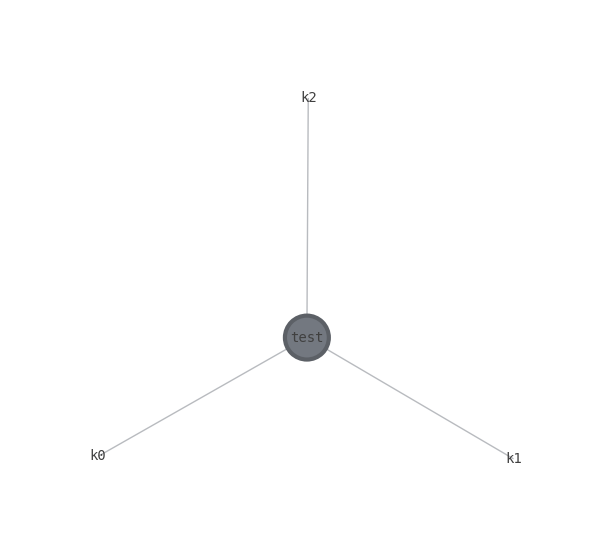

In [3]:
test_tn.draw()

In [4]:
X = qu.tensor.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags=['PAULI', 'X', '0'])
Y = qu.tensor.Tensor(qu.pauli('Y'), inds=('k1', 'b1'), tags=['PAULI', 'Y', '1'])

In [5]:
TN = test_tn & X & Y

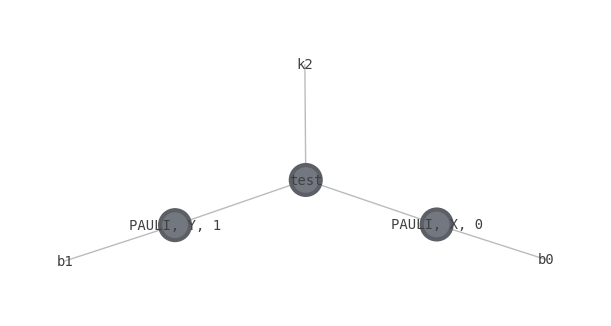

In [6]:
TN.draw()

In [8]:
leftTerminator_array = np.zeros(3)
Dmid_array = np.zeros((12,12))    # bulk node
Dending_array = np.zeros((12,20)) # second-to-last node
Dend_array = np.zeros((20,24))    # last node
rightTerminator_array = np.zeros(6)
h = 0.5**10

In [11]:
leftTerminator_array[0] = 1
leftTerminator_array[1] = 1
leftTerminator_array[2] = 1

Dmid_array[0, 0] = 1
Dmid_array[1, 1] = 1
Dmid_array[2, 2] = 1
Dmid_array[3, 3] = 1

# When sending in 1 from the right: add */
Dmid_array[1+4*0, (0+4*1)] = 1
Dmid_array[0+4*1, (1+4*1)] = 1
Dmid_array[3+4*0, (2+4*1)] = 1 #01->11
Dmid_array[2+4*1, (3+4*1)] = 1 #11->01+

# When sending in 2 from the right: substract */
Dmid_array[1+4*2, (0+4*2)] = 1
Dmid_array[0+4*0, (1+4*2)] = 1
Dmid_array[3+4*2, (2+4*2)] = 1 #01->11-
Dmid_array[2+4*0, (3+4*2)] = 1 #11->01

# Dending *
# When sending in 0 from the right: do nothing */
Dending_array[0, 0] = 1
Dending_array[1, 1] = 1
Dending_array[2, 2] = 1
Dending_array[3, 3] = 1

# When sending in 1 from the right: add */
Dending_array[1+4*0, (0+4*1)] = 1
Dending_array[0+4*1, (1+4*1)] = 1
Dending_array[3+4*0, (2+4*1)] = 1
Dending_array[2+4*1, (3+4*1)] = 1

# When sending in 2 from the right: substract */
Dending_array[1+4*2, (0+4*2)] = 1
Dending_array[0+4*0, (1+4*2)] = 1
Dending_array[3+4*2, (2+4*2)] = 1
Dending_array[2+4*0, (3+4*2)] = 1

# When sending in 3 from the right: add 4h */
Dending_array[0+4*1, (0+4*3)] = 1 #add
Dending_array[1+4*1, (1+4*3)] = 1 #add
Dending_array[2+4*1, (2+4*3)] = 1 #add
Dending_array[3+4*1, (3+4*3)] = 1 #add

# When sending in 4 from the right: substract 4h */
Dending_array[0+4*2, (0+4*4)] = 1 #substract
Dending_array[1+4*2, (1+4*4)] = 1 #substract
Dending_array[2+4*2, (2+4*4)] = 1 #substract
Dending_array[3+4*2, (3+4*4)] = 1 #substract

# Dend */
# When sending in 0 from the right: do nothing */
Dend_array[0, 0] = 1
Dend_array[1, 1] = 1
Dend_array[2, 2] = 1
Dend_array[3, 3] = 1

# When sending in 1 from the right: add */
Dend_array[1+4*0, (0+4*1)] = 1
Dend_array[0+4*1, (1+4*1)] = 1
Dend_array[3+4*0, (2+4*1)] = 1
Dend_array[2+4*1, (3+4*1)] = 1

# When sending in 2 from the right: substract */
Dend_array[1+4*2, (0+4*2)] = 1
Dend_array[0+4*0, (1+4*2)] = 1
Dend_array[3+4*2, (2+4*2)] = 1
Dend_array[2+4*0, (3+4*2)] = 1

# When sending in 3 from the right: go to 2h */
Dend_array[0+4*1, (0+4*3)] = -1 #add
Dend_array[0+4*2, (0+4*3)] = +1 #substract
Dend_array[1+4*1, (1+4*3)] = -1 #add
Dend_array[1+4*2, (1+4*3)] = +1 #substract
Dend_array[2+4*1, (2+4*3)] = -1 #add
Dend_array[2+4*2, (2+4*3)] = +1 #substract
Dend_array[3+4*1, (3+4*3)] = -1 #add
Dend_array[3+4*2, (3+4*3)] = +1 #substract

# When sending in 4 from the right: go to 3h */
# Perform the addition & substraction at this end node, and send instructions to next node */
Dend_array[1+4*1, (0+4*4)] = -1 #add
Dend_array[0+4*2, (1+4*4)] = +1 #substract
Dend_array[3+4*1, (2+4*4)] = -1 #add
Dend_array[2+4*2, (3+4*4)] = +1 #substract
# Special case when remainder must be transferred */
Dend_array[1+4*4, (0+4*4)] = +1 #substract 4h
Dend_array[0+4*3, (1+4*4)] = -1 #add 4h
Dend_array[3+4*4, (2+4*4)] = +1 #substract 4h
Dend_array[2+4*3, (3+4*4)] = -1 #add 4h

# When sending in 5 from the right: go to 4h */
# Add 4h */
Dend_array[0+4*3, (0+4*5)] = -1
Dend_array[1+4*3, (1+4*5)] = -1
Dend_array[2+4*3, (2+4*5)] = -1
Dend_array[3+4*3, (3+4*5)] = -1
# Substract 4h */
Dend_array[0+4*4, (0+4*5)] = +1
Dend_array[1+4*4, (1+4*5)] = +1
Dend_array[2+4*4, (2+4*5)] = +1
Dend_array[3+4*4, (3+4*5)] = +1

# Right terminating array (for Dend) */
# 8th order */
rightTerminator_array[0] = 0 #do nothing
rightTerminator_array[1] = -4/(5*h)  #add at h
rightTerminator_array[2] = +4/(5*h)  #substract at h
rightTerminator_array[3] = -1/(5*h)  #add & substract at 2h
rightTerminator_array[4] = +4/(105*h)#add & substract at 3h
rightTerminator_array[5] = -1/(280*h)#add & substract at 4h

In [ ]:
/* Create the nodes */
Dmid = tntNodeCreate(&Dmid_array, "DLUR", 4, 3, 4, 3);
Dending = tntNodeCreate(&Dending_array, "DLUR", 4, 3, 4, 5);
Dend = tntNodeCreate(&Dend_array, "DLUR", 4, 5, 4, 6);
rightTerminator = tntNodeCreate(&rightTerminator_array, "LR", 6, 1);
leftTerminator = tntNodeCreate(&leftTerminator_array, "LR", 1, 3);
/* Use terminating nodes to produce starting and ending D nodes */
/* First Dstart */
Dmidc = tntNodeCopy(Dmid);
tntNodeJoin(leftTerminator,"R",Dmidc,"L");
Dstart = tntNodeContract(leftTerminator,Dmidc);
/* Then Dend */
tntNodeJoin(Dend,"R",rightTerminator,"L");
Dend = tntNodeContract(rightTerminator,Dend);

/* Produce the full network */
/* First initialise it */
d1 = tntNetworkCreate();

/* Insert the bulk nodes */
for(unsigned i = 0; i<L-3; i++){
    /* Create mid node at i */
    Dmidc = tntNodeCopy(Dmid);
    tntNodeInsertAtStart(Dmidc, "L", "R", d1);
}

/* Finally, insert the terminating nodes */
tntNodeInsertAtStart(Dstart,"L","R",d1);
tntNodeInsertAtEnd(Dending,"L","R",d1);
tntNodeInsertAtEnd(Dend,"L","R",d1);

In [ ]:
Dmid_array.reshape((4, 3, 4, 3))
Dending_array.reshape((4, 3, 4, 5))
Dend_array.reshape((4, 5, 4, 6))
rightTerminator_array.reshape((6, 1))
leftTerminator_array.reshape((1, 3))

In [ ]:
Dmid = qu.tensor.MatrixProductOperator(Dmid_array.reshape((4, 3, 4, 3)), 'dlur')
Dending = qu.tensor.MatrixProductOperator(Dending_array.reshape((4, 3, 4, 5)), 'dlur')
Dend = qu.tensor.MatrixProductOperator(Dend_array.reshape((4, 5, 4, 6)), 'dlur')
rightTerminator = qu.tensor.MatrixProductOperator(rightTerminator_array.reshape((6, 1)), 'lr')
leftTerminator = qu.tensor.MatrixProductOperator(leftTerminator_array.reshape((1, 3)), 'lr')

In [52]:
leftTerminator_tensor = qu.tensor.Tensor(leftTerminator_array.reshape((1, 3)), ('l0', 'r0'), 'lT')
Dmid_tensor = qu.tensor.Tensor(Dmid_array.reshape((4, 3, 4, 3)), ('d1', 'r0', 'u1', 'r1'), 'Dmid')

In [60]:
test = leftTerminator_tensor & Dmid_tensor
test_ = test ^ ...
test_.data

array([[[[1., 1., 1.],
         [0., 1., 0.],
         [0., 0., 0.],
         [1., 0., 1.]],

        [[0., 0., 0.],
         [1., 0., 1.],
         [1., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 1., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]]])

In [65]:
Dmid_array.reshape((4, 3, 4, 3)).transpose((1, 0, 2, 3)).reshape((3, -1))


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

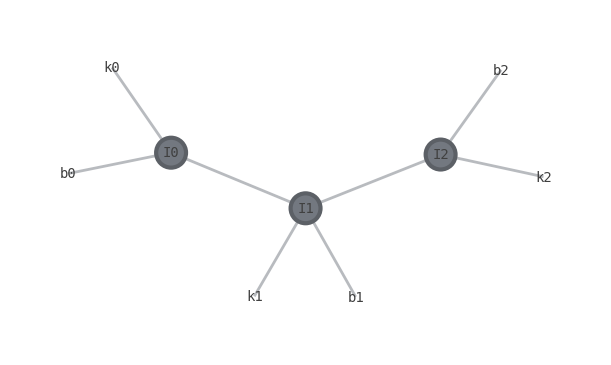

In [39]:
test = np.ones(2**8).reshape((4, 4, 4, 4))
test_L = test[0, :, :, :]
test_R = test[:, :, :, 0]
test_all = (test_L, test, test_R)
qu.tensor.MatrixProductOperator(test_all).draw()

In [26]:
A = qu.tensor.MPO_rand_herm(20, bond_dim=7, tags=['HAM'])

In [37]:
A.arrays[0].shape

(7, 2, 2)

In [8]:
dx_block = np.array([[0, 1, 0, -1], [1, 0, -1, 0], [0, 1, 0, -1], [-1, 0, 1, 0]])
dx_2d_array = np.tensordot(np.eye(4), dx_block, axes=0)

In [9]:
dx_2d_array

array([[[[ 0.,  1.,  0., -1.],
         [ 1.,  0., -1.,  0.],
         [ 0.,  1.,  0., -1.],
         [-1.,  0.,  1.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  1.,  0., -1.],
         [ 1.,  0., -1.,  0.],
         [ 0.,  1.,  0., -1.],
         [-1.,  0.,  1.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.

In [433]:
np.block([[np.eye(3), 2*np.eye(3)], [3*np.eye(3), 4*np.eye(3)]])

array([[1., 0., 0., 2., 0., 0.],
       [0., 1., 0., 0., 2., 0.],
       [0., 0., 1., 0., 0., 2.],
       [3., 0., 0., 4., 0., 0.],
       [0., 3., 0., 0., 4., 0.],
       [0., 0., 3., 0., 0., 4.]])